In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read CSV file
df = pd.read_csv(
    'Nat_Gas.csv'
    , parse_dates=['Dates']
    , dayfirst = False
)

In [4]:
# Clean up column names and types
df = df.sort_values('Dates').reset_index(drop=True)
df['Price'] = df['Prices'].astype(float)

In [5]:
# Time trend and seasonal features
df['t'] = (df['Dates'] - df['Dates'].min()).dt.days
df['month'] = df['Dates'].dt.month
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

In [6]:
# Train a simple linear model
features = ['t', 'sin_month', 'cos_month']
model = LinearRegression()
model.fit(df[features], df['Price'])

LinearRegression()

In [8]:
# Create a date range for historical + 1 year forecast
start_date = df['Dates'].min()
end_date = df['Dates'].max() + pd.DateOffset(years=1)
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
forecast_df = pd.DataFrame({'Dates' : all_dates})
forecast_df['t'] = (forecast_df['Dates'] - start_date).dt.days
forecast_df['month'] = forecast_df['Dates'].dt.month
forecast_df['sin_month'] = np.sin(2 * np.pi * forecast_df['month'] / 12)
forecast_df['cos_month'] = np.cos(2 * np.pi * forecast_df['month'] / 12)
forecast_df['EstimatedPrice'] = model.predict(forecast_df[['t', 'sin_month', 'cos_month']])

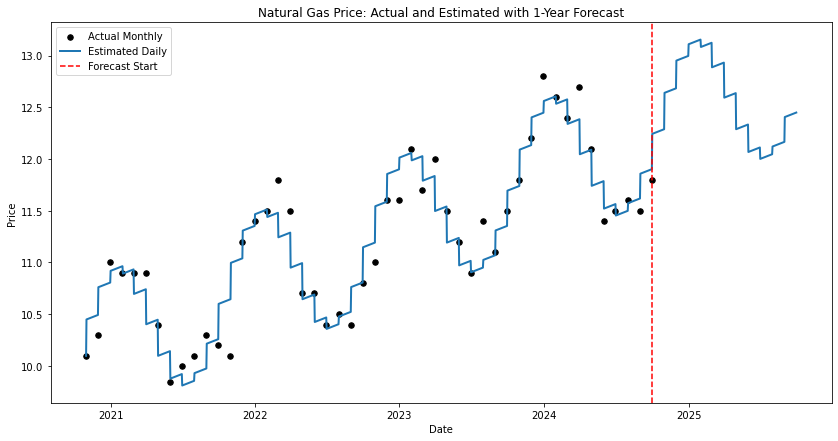

In [10]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.scatter(df['Dates'], df['Price'], label='Actual Monthly', color='black', s = 30)
plt.plot(forecast_df['Dates'], forecast_df['EstimatedPrice'], label='Estimated Daily', linewidth = 2)
plt.axvline(df['Dates'].max(), color='red', linestyle = '--', label='Forecast Start')
plt.title('Natural Gas Price: Actual and Estimated with 1-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
# Function to estimate price for any date
def estimate_price(date_str):
    d = pd.to_datetime(date_str)
    t = (d - start_date).days
    sin_m = np.sin(2 * np.pi * d.month / 12)
    cos_m = np.cos(2 * np.pi * d.month / 12)
    return model.predict([[t, sin_m, cos_m]])[0]

In [15]:
# Example
print(estimate_price('2025-06-15'))

12.088752891884306


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
